In [1]:
#Created by Kacper Lasocha, Jagiellonian University, Institute of Physics 
#kacper.lasocha@doctoral.uj.edu.pl

import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erf
from scipy.stats import iqr, norm, multivariate_normal

# Nonparametric Inference

Problems in which the form of the underlying distribution is specified up to a set of unknown parameters are called **parametric** inference problems. In this notebook we will focus on those in which nothing is assumed about the form of the distribution. Such problems are called **nonparametric** inference problems.

For most of this notebook, we will be working on the distribution given by:

$$ F(x) = 2 \sin\left[ 2 \pi x \right]^2  \ \ \ \ for \ x \in [0,1].$$

Every time the name $F$ distribution is used, I refer to this distribution.

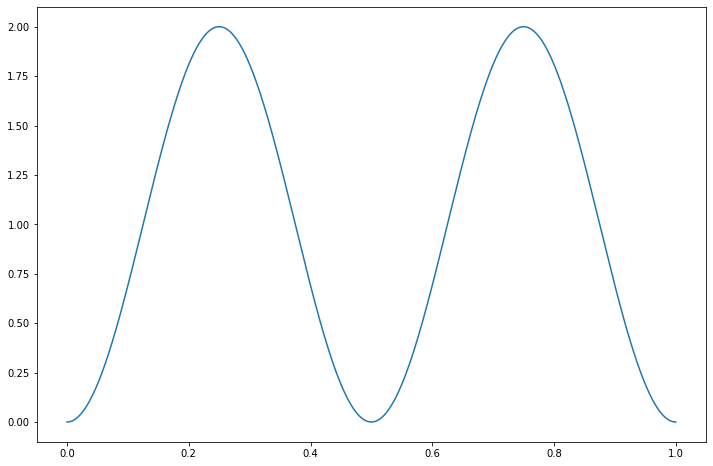

In [2]:
def dist(x):
    return np.sin(x*2*np.pi)**2 *2

def accept_rejection_sampling(dist, size = 1):
    dist_x = np.linspace(0,1, 1000)
    dist = dist(dist_x)
    samples = []
    while len(samples) < size:
        x = np.random.uniform()
        y = np.random.uniform(0, max(dist))
        if y < np.interp(x, dist_x, dist):
            samples.append(x)
    return samples


def integral_sq(a, b, C):
    L = (8*(3 - 4*C + 2*C**2)*np.pi *a + 8* (-1 +  C)* np.sin(4 *np.pi* a) + np.sin(8 *np.pi* a))/(16 *np.pi)
    R = (8*(3 - 4*C + 2*C**2)*np.pi *b + 8* (-1 + C)* np.sin(4 *np.pi* b) + np.sin(8 *np.pi* b))/(16 *np.pi)
    return R-L


x = np.linspace(0,1,1000)
y = dist(x)
plt.figure(figsize = (12,8))
plt.plot(x,y)
plt.show()

## Ex 1
Take 500 samples from the distribution $F$. Plots histogram with: 5, 20 and 150 bins together with the underlying distribution. Which number of bins seems the most suitable?


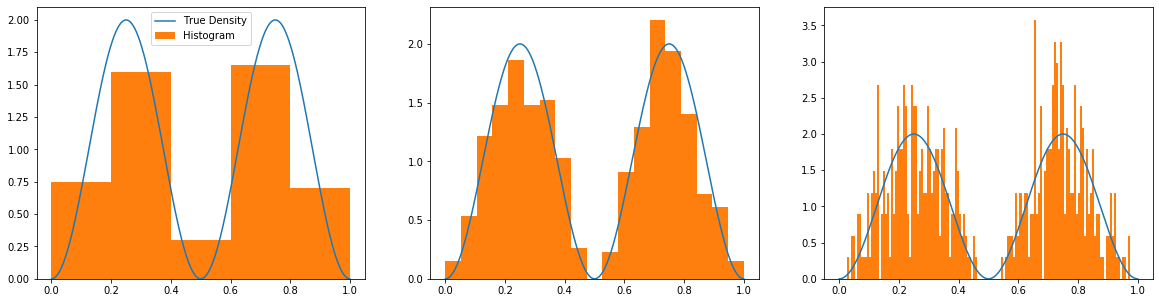

In [3]:
sample = accept_rejection_sampling(dist, size = 500)

#Here goes your code



# Bias - Variance Tradeoff

We shall start with introducing the notation. Let $f(x)$ be and underlying, not known distribution. We are given with a finite sample $X$ taken from distribtion defined by $f$. Our goal is to construct an estimator $\widehat{f}(x)$, which resembles $f(x)$. As a metric we shall use Squared Error, that is:

$$SE: \ \ \ \left( \widehat{f}(x) - f(x) \right)^{2}. $$

As we aim for the resemblence on the whole domain, we'll be specifically interested in Integrated Squared Error, that is:

$$ISE: \ \ \ \int \left( \widehat{f}(x) - f(x) \right)^{2} \ dx. $$

Finally, we calculate $\widehat{f}(x)$ basing on the specific, random sample $X$. In general, for two different $X_{1}, X_{2}$ we will have two different $\widehat{f}_{1}(x),\widehat{f}_{2}(x)$. For that reason we will introduce Mean Integrated Squared Error, as:

$$MISE: \ \ \ \mathbb{E} \left[ \int \left( \widehat{f}(x) - f(x) \right)^{2} \ dx \right]. $$

It is common to expand the MISE in the following form:

$$MISE: \ \ \ \mathbb{E} \left[ \int \left( \widehat{f}(x) - f(x) \right)^{2} \ dx \right] = \int  \Big(\operatorname{Bias}\big[\widehat{f}(x)\big] \Big) ^2 + \operatorname{Var}\big[\widehat{f}(x)\big] \ dx. $$

where:

$$\operatorname{Bias}\big[\widehat{f}(x)\big] = \operatorname{E}\big[\widehat{f}(x)\big] - f(x) ,$$

and:

$$\operatorname{Var}\big[\widehat{f}(x)\big] = \operatorname{E}[\widehat{f}(x)^2] - \operatorname{E}[{\widehat{f}}(x)]^2.$$

Such a representation enables us to distinguish to different sources of an error. The bias term represents how distant is, on average, our estimate from the true distribution. It is clear that high bias will lead to high error. On the other hand, even if our estimate is **on average** correct, but the spread of possible values is significant, this will result in higher squared error. Such variability is reflected in the value of variance. Generally, simple models will feature high bias and small variance, while complex estimators tend to have small bias on the cost of high variance (see Assignment2 Ex. 1c).


## Ex 2 
Take $n = 500$ samples from $F$ distribution. For number of bins from 5 to 100 calculate and plot MISE, integrated $Bias^{2}$ and integrated Variance. Find optimal binning.       

hints:
* You can approximate $\operatorname{E}\big[\widehat{f}(x)\big]$ by taking an average of *many* $\widehat{f}(x)$ for randomly chosen $X$. A definition of *many* depends on your resources, 500 is sufficient.
* Histogram is basically a step function.
* To save your time, I've implemented above the function *integral_sq(a, b, C)*, which gives you a value of $ \int_{a}^{b} (F(x) - C)^{2} \ dx$.

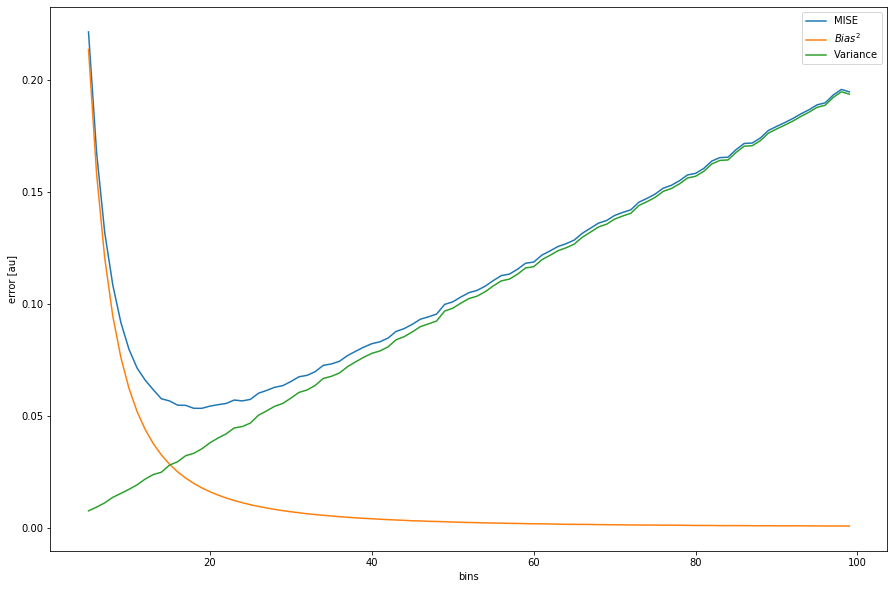

Optimal bins number: 19


In [4]:
#Here goes your code



# Choosing number of bins

As we see choosing the proper binning is essential for minising the value of MISE. There are some general rules for choosing proper bin width $h$:

Optimal $h$ (requires knowledge of distribution):
$$ h_{*} = \left( \dfrac{6}{n \int (f'(x))^{2} \ dx} \right) ^ {\dfrac{1}{3}}$$

Rule of thumb $h$ (uses only known sample X):
$$ h_{*} = 2 \dfrac{IQR(X)}{\sqrt[3]{n}},   $$

where IQR(X) is the interquartile range of sample X.

For more information on the optimal bin number, see:
http://www.numdam.org/article/PS_2006__10__24_0.pdf

## Ex 2.5
What are binnings suggested by mentioned formulas for an arbitrary sample of 500 elements? 

In [5]:
# Here goes your code


# Hint: scipy.stats.iqr

Optimal bins number: 18.738557776012723
Rule of thumb bins number: 8.12915122364617


# Kernel Density Estimation


Kernel density estimators is an important family of non-parametric estimators. The idea behind them is as follows: while for histograms every $X_{i}$ contributes only to a single bin, for kernel density estimators it's contribution is smeared around in a way defined by a kernel (which is a probability distribution itself). Defining formally, for sample $X$ of size $n$, kernel $K$ and bandwith $h$, we define the kernel density estimator as:  

$$\widehat{f_{n}}(x) = \dfrac{1}{nh} \sum_{i-1}^{N} K( \dfrac{x-X_{i}}{h})$$

# Ex 3 
Take $n = 500$ samples from $F$ distribution. Implement Gaussian kernel density estimator (yourself, don't use any library!) and plot estimates for $h = \frac{1}{6}, \frac{1}{20}, \frac{1}{150}$. Compare with histograms from Ex 1 and true distribution.

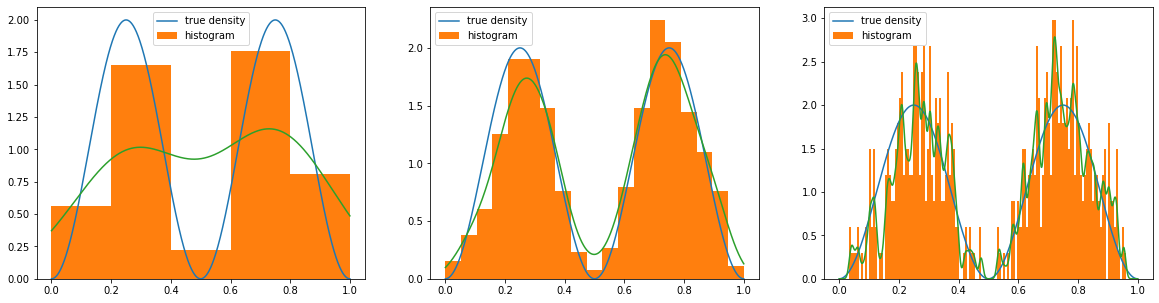

In [6]:
# Here goes your code


# Hint: scipy.stats.norm


# Ex 4 
Using **KernelDensity** module from **sklearn.neighbors** package calculate and plot kernel density estimates of density $F$ and simplified toy distribution. Choose $h = \frac{1}{20}$ and:    
a) Tophat kernel,    
b) Gaussian kernel,    
c) Exponential kernel,    
d) Linear kernel,    
e) Cosine kernel.    

More information on these kernels and KernelDensity package can be found here:    
https://scikit-learn.org/stable/modules/density.html

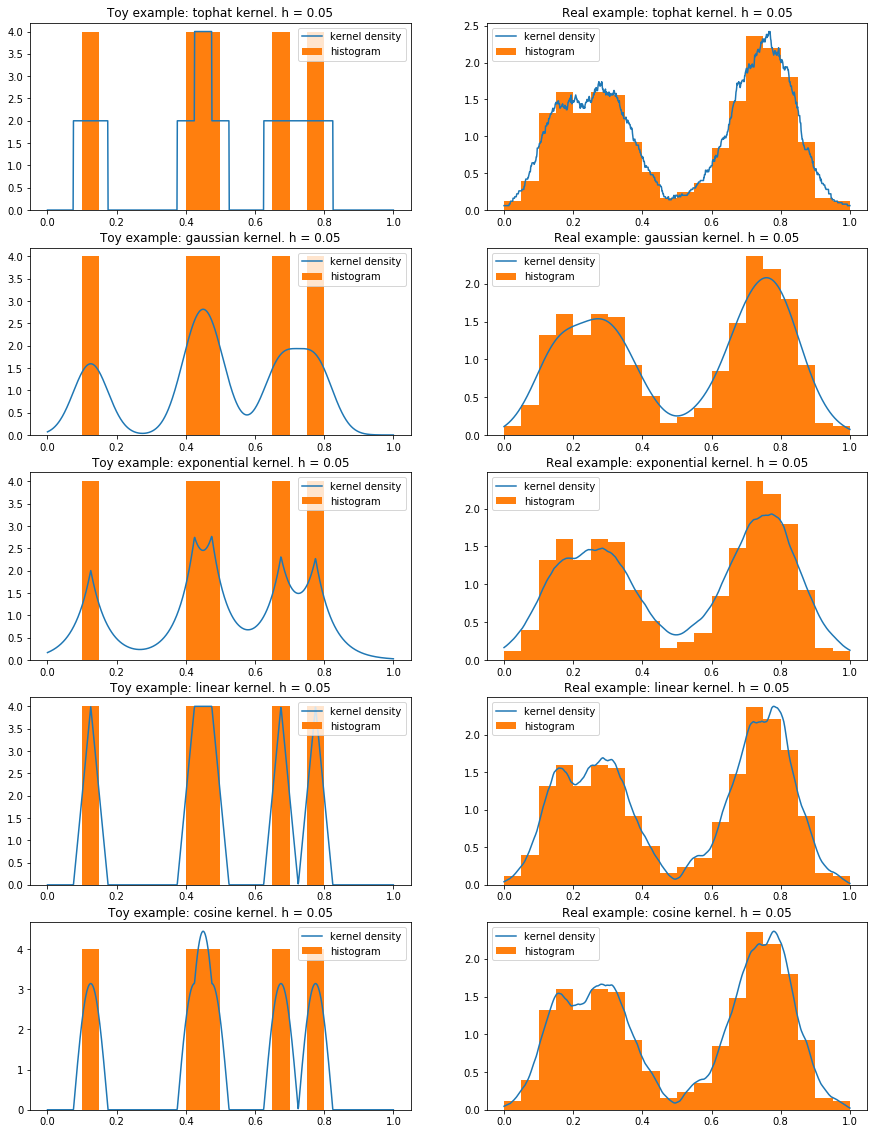

In [7]:
#hint:  KernelDensity(), kde.fit(), kde.score_samples()
#hint: kde.score_samples() returns log of density!

from sklearn.neighbors import KernelDensity

sample = accept_rejection_sampling(dist, size = 500)
sample_toy = [0.125, 0.425, 0.475, 0.675, 0.775]


# Here goes your code


It can be shown, that for a kernel $K$ and distribution $f$, assymptotically optimal $h$ is given by:

$$h_{*} = \left( \dfrac{c_{2}}{c_{1}^{2} A(f) n} \right)^{\dfrac{1}{5}} $$
where $n$ is the number of samples, and:    
$c_{1} = \int x^{2} K(x) \ dx,$    
$c_{2} = \int  K^{2}(x) \ dx,$    
$A(f) = \int (f''(x))^{2} \ dx $.


It is though completely unpractical, as it requires the knowledge of the distribution $f$, which we're trying to estimate. For practical purposes, there exist two rules of thumb for a *good* bandwidth of gaussian kernel, which are basing on sample's $X$ properties:

Silvermans rule:
$$ h_{*} = 0.9 \min \left\lbrace \frac{IQR(X)}{1.34}, \sigma(X) \right\rbrace n^{-\dfrac{1}{5}} $$
Scotts rule:
$$ h_{*} = 1.06 \min \left\lbrace \frac{IQR(X)}{1.34}, \sigma(X) \right\rbrace n^{-\dfrac{1}{5}} $$





# Ex 5
Calculate an optimal bandwidth $h$ for $F$ distribution, $n=500$ and:    
a) Tophat kernel,    
b) Gaussian kernel,    
c) Exponential kernel,    
d) Linear kernel,    
e) Cosine kernel.   

Does the ratio of these bandwidths depend on the distribution? Can you derive Silverman and Scotts Rules for other kernels than gaussian?    

Plot kernel density estimates as in the previous exercise (you may skip toy distribution), but this time with respective optimal bandwidths.    

This is not calculus course, feel free to use wolfram alpha, mathematica etc.

In [8]:
# Here goes your code


Tophat h: 0.06790357019008923
Gaussian h: 0.033972156856545116
Exponential h: 0.025131598364836878
Linear h: 0.08262022158178547
Cos h: 0.0772858644757771


In [9]:
# Here goes your code


Silverman rule:
0.0690283755808
Scott rule:
0.0813000867952


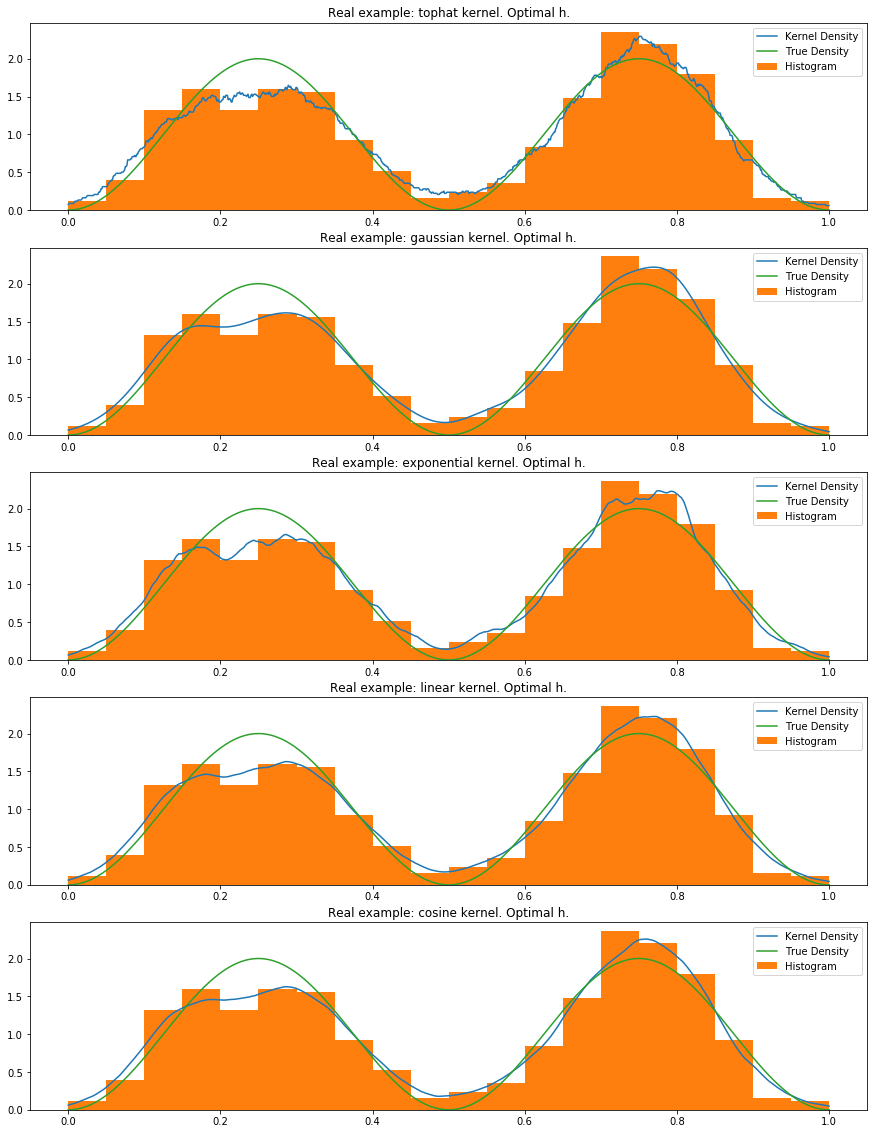

In [10]:
# Here goes your code


# Error evaluation

## Ex 6
The goal of this exercise is to show how does an error decreases with an increase on $n$, the sample size.

For $n$ from 10 to 1000 with the step of 1000 calculate:    
a) Error of gaussian kernel density estimation with an optimal h,    
b) Error of gaussian kernel density estimation with a rule of thumb h,    
c) Error of histogram estimation with an optimal binning,    
d) Error of histogram estimation with a rule of thumb binning,        


Scale all the errors  so that error for $n=10$ is equal to one. Then, plot the inverse of optimal errors and the inverse of rule of thumb errors.

If you have resources, calculate errors few times and average to get smoother curves. You can approximate errors by taking a square of densities' differences in many points.

Try to guess what is the dependence of error on $n$ in the case of kernel and histogram.

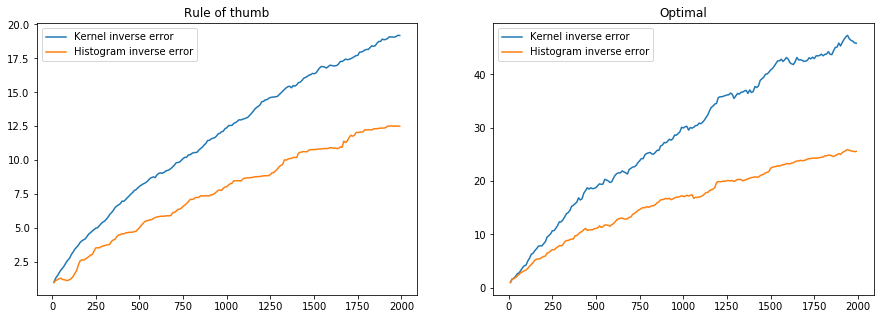

In [11]:
# Here goes your code


Here comes your guess on $n$ and error relation:

$$Error_{histogram} \sim ?$$
$$Error_{kernel} \sim ?$$

# Multidimensional KDE

KDE extends naturally to higher dimensions:

$$\widehat{f}(x) = \dfrac{1}{n \sqrt{|H|}} \sum_{i-1}^{n} K \left( H^{-1}(x-X_{i}) \right),$$

This puts ad-dimensional “bump” at each data point. The matrix $H$ controls the size and shape of the bump.    



Like before, we also have rules of thumb for the matrix $H$:

Silverman's rule:

$$ \sqrt{\mathbf{H}_{ii}} = \left(\frac{4}{d+2}\right)^{\frac{1}{d+4}} n^{\frac{-1}{d+4}} \sigma_i $$ 

Scott's rule:

$$\sqrt{\mathbf{H}_{ii}} =  n^{\frac{-1}{d+4}} \sigma_i,$$
 
where in both cases: $\sigma_i$ is the standard deviation of the ith variable and $\mathbf{H}_{ij} = 0, i\neq j$.

Finally, a relation between number of samples and error for d-dimensional kernel estimation is:

$$Error_{d} \sim n^{-\dfrac{4}{5+d}}$$

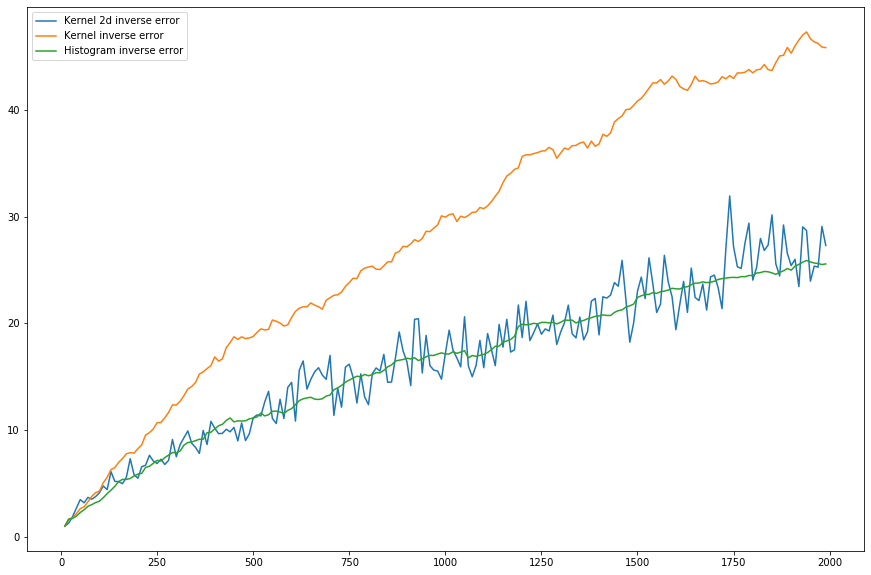